## Coding Exercise #0404

### 1. Reducción Dimensional con PCA:

- `import numpy as np`: Importa la biblioteca NumPy, que se utiliza para trabajar con arreglos y realizar operaciones matemáticas de manera eficiente.
- `import pandas as pd`: Importa la biblioteca pandas, que se utiliza para la manipulación y análisis de datos, especialmente con estructuras de datos como DataFrames.
- `import matplotlib.pyplot as plt`: Importa la biblioteca Matplotlib, específicamente el módulo pyplot, que se utiliza para crear gráficos y visualizaciones.
- `from sklearn.datasets import make_blobs`: Importa la función `make_blobs` del módulo `datasets` de scikit-learn, que se utiliza para generar conjuntos de datos sintéticos.
- `from sklearn.decomposition import PCA, NMF`: Importa las clases `PCA` (Análisis de Componentes Principales) y `NMF` (Factorización de Matriz No Negativa) del módulo `decomposition` de scikit-learn, que se utilizan para la reducción de dimensionalidad.
- `%matplotlib inline`: Es un comando mágico de Jupyter Notebook que permite que las visualizaciones de Matplotlib se muestren directamente en el notebook.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA, NMF
%matplotlib inline

#### 1.1. Lectura y exploración de los datos:

1. Infere el encabezado: El parámetro header='infer' indica que pandas debe inferir la fila del encabezado automáticamente. Si no se especifica, pandas asume que la primera fila del archivo contiene los nombres de las columnas.
2. Almacena los datos en un DataFrame: Los datos leídos del archivo CSV se almacenan en un objeto DataFrame llamado

In [3]:
df = pd.read_csv('data_number_nine.csv', header='infer') # Leer el archivo CSV con los datos

In [4]:
df.shape # Mostrar el tamaño del DataFrame

(23, 23)

In [5]:
df.head(5) # Mostrar las primeras 5 filas del DataFrame

X1     X2     X3     X4     X5     X6      X7     X8      X9     X10  \
0  0.006  0.006  0.006  0.005  0.005  0.005  0.0050  0.005  0.0050  0.0050   
1  0.005  0.005  0.005  0.005  0.005  0.005  0.0050  0.005  0.0050  0.0050   
2  0.005  0.005  0.005  0.005  0.005  0.005  0.0050  0.005  0.0050  0.0050   
3  0.005  0.005  0.005  0.005  0.005  0.005  0.0050  0.005  0.1797  0.5951   
4  0.005  0.005  0.005  0.005  0.005  0.005  0.1836  0.599  0.9368  0.9911   

   ...     X14     X15     X16     X17     X18     X19     X20    X21    X22  \
0  ...  0.0050  0.0050  0.0050  0.0050  0.0050  0.0050  0.0050  0.005  0.006   
1  ...  0.0050  0.0050  0.0050  0.0050  0.0050  0.0050  0.0050  0.005  0.005   
2  ...  0.7854  0.7776  0.3738  0.1486  0.0050  0.0050  0.0050  0.005  0.005   
3  ...  0.9911  0.9911  0.9911  0.9756  0.8242  0.5912  0.0283  0.005  0.005   
4  ...  0.5214  0.6099  0.7815  0.9911  0.8941  0.8785  0.4088  0.005  0.005   

     X23  
0  0.006  
1  0.005  
2  0.005  
3  0.005  
4  0.005  

[5 rows x 23 columns]

#### 1.2. Visualización de los datos:


La función presentada a continuación:

Muestra una imagen en escala de grises invertida.

Parámetros:
X (array-like): Una matriz de valores que representa la imagen original.

Esta función toma una matriz de valores, invierte los valores (1.0 - X) y 
muestra la imagen resultante en escala de grises utilizando matplotlib.

In [6]:
def ShowMe(X):
    Y= 1.0 - X
    plt.imshow(Y, cmap='gray')
    plt.show()

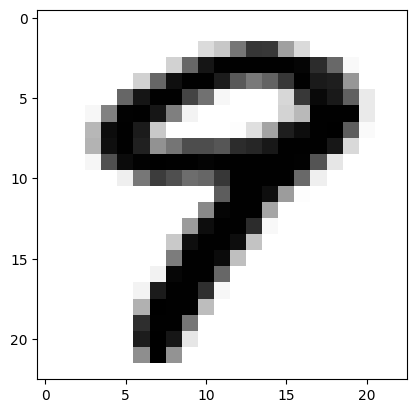

In [ ]:
X = np.array(df) # Convertir el DataFrame a un arreglo
ShowMe(X) # Se muestra la imagen original

#### 1.3. Visualizar la demensionalidad reducida de la entrada por PCA:

In [8]:
# Definir una función para reducir la dimensionalidad de los datos utilizando PCA
def reducedInputPCA(X,nPC):
    pca = PCA(n_components = nPC)                           # Crear un objeto PCA con el número de componentes deseados.
    X_pca = pca.fit_transform(X)                            # Obtener los scores de los componentes principales.
    return pca.inverse_transform(X_pca)                     # Reconstruir los datos originales a partir de los scores.

N# of PCs = 23


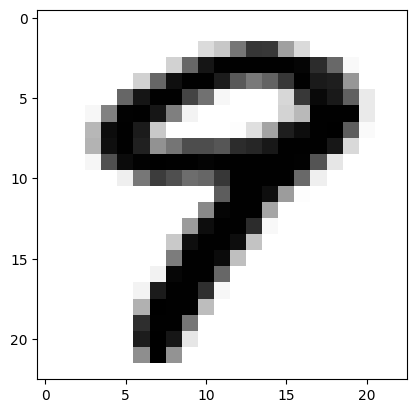

N# of PCs = 10


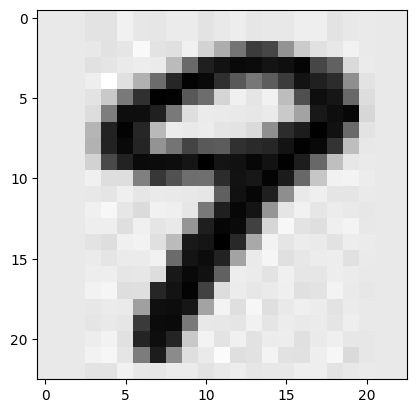

N# of PCs = 5


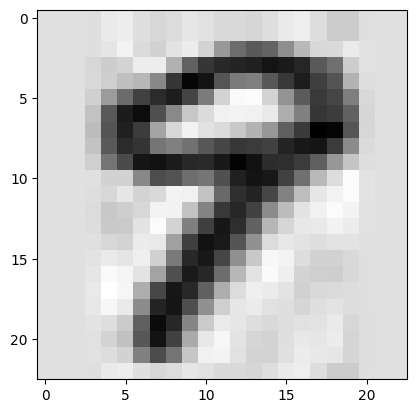

N# of PCs = 3


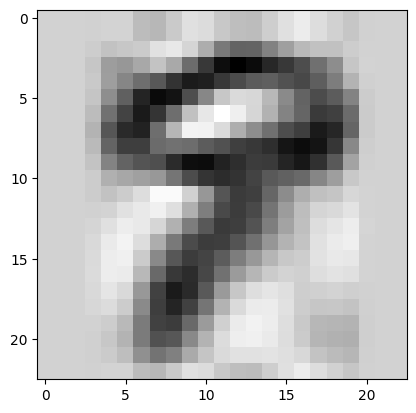

N# of PCs = 1


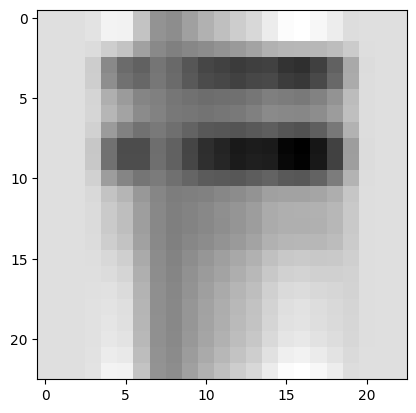

In [9]:
# Visualizar la imagen original y las imágenes reducidas en dimensiones.
# Se reducirá la dimensionalidad a 23, 10, 5, 3 y 1 componente(s) principal(es).
for nPC in [23, 10, 5, 3, 1]:
    Z = reducedInputPCA(X,nPC)
    print( "N# of PCs = " + str(nPC))
    ShowMe(Z)

#### 1.4. Análisis de el ratio de varianza acumulativa (CVR):

In [10]:
# Se realiza una reducción de dimensionalidad utilizando Análisis de Componentes Principales (PCA).
pca = PCA(n_components = 23)  
# Define un objeto PCA con 23 componentes principales. PCA es una técnica de reducción de 
# dimensionalidad que transforma los datos originales en un nuevo conjunto de variables 
# (componentes principales) que explican la mayor parte de la varianza en los datos originales. 
# En este caso, se especifica que se desean 23 componentes principales.
pca.fit(X)                    
# Entrena el modelo PCA con los datos X. Esto significa que el modelo PCA se ajusta a los datos 
# proporcionados en X, calculando los componentes principales y la varianza explicada por cada uno de ellos.

PCA(n_components=23)

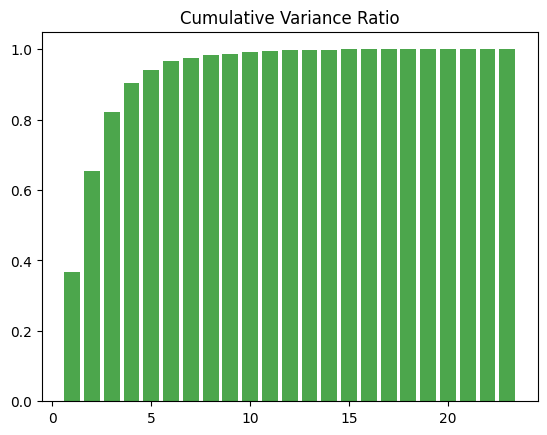

In [11]:
# Visualizar los CVRs como un gráfico de barras.

# Se calcula los CVRs utilizando la suma acumulativa de la proporción de varianza explicada por cada componente principal (PC) del análisis de componentes principales (PCA).
# nPCs Define un array que corresponde al número de componentes principales (PCs), en este caso, del 1 al 23.
CVRs = np.cumsum(pca.explained_variance_ratio_)        # Calcular los CVRs.
nPCs = np.arange(23)+1                                 # Definir un array que corresponde al número de PCs.
plt.bar(nPCs, CVRs, color='green', alpha=0.7)          # Crear un gráfico de barras para los CVRs.
plt.title('Cumulative Variance Ratio')                 # Añadir un título al gráfico.
plt.show()                                             # Mostrar el gráfico.

### 2. Reducción dimensional con NMF:

NMF (Factorización de Matriz No Negativa) es aplicable para matrices de datos que contienen solo valores no negativos.<br>
Similar al PCA, podemos hacer reducción de dimensionalidad y obtener una entrada de dimensionalidad reducida usando NMF.<br>
Notamos que obtenemos imágenes un poco menos 'ruidosas' en comparación con el resultado de PCA.<br>
Más información en [Wikipedia](https://en.wikipedia.org/wiki/Non-negative_matrix_factorization).

#### 2.1. Visualizar la entrada dimensional reducidad por NMF:

In [12]:
# Se realiza una reducción de dimensionalidad utilizando Análisis de Factorización de Matriz No Negativa (NMF).
def reducedInputNMF(X,n):
    nmf = NMF(n_components=n, init='random', random_state=0)      # Se crea un objeto NMF con el número de componentes deseados.
    X_nmf = nmf.fit_transform(X)                                  # Se obtienen los scores de los componentes principales.
    return nmf.inverse_transform(X_nmf)                           # Se reconstruyen los datos originales a partir de los scores.

N# of Components = 23


/home/cris_dev/Documents/Samsung-Innovation-Campus/env/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


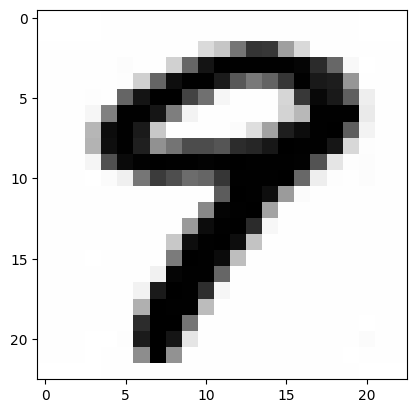

N# of Components = 10


/home/cris_dev/Documents/Samsung-Innovation-Campus/env/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


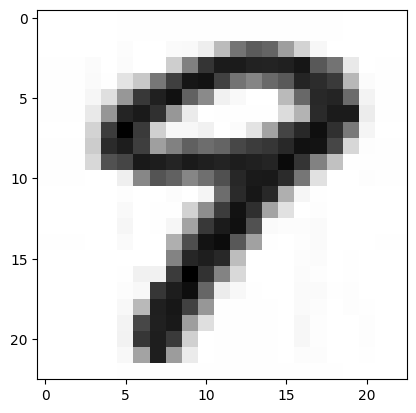

N# of Components = 5


/home/cris_dev/Documents/Samsung-Innovation-Campus/env/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


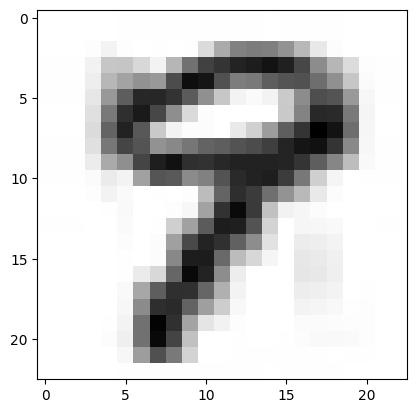

N# of Components = 3


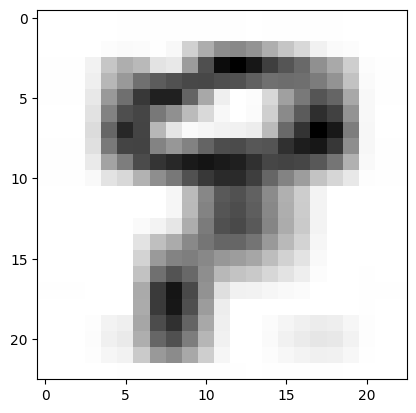

N# of Components = 1


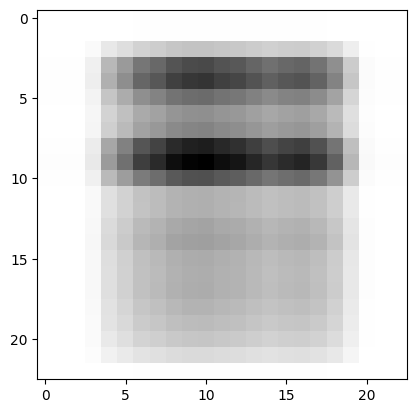

In [13]:
# se visualiza la imagen original y las imágenes reducidas en dimensiones.
# Se reducirá la dimensionalidad a 23, 10, 5, 3 y 1 componente(s) principal(es).
for n in [23, 10, 5, 3, 1]:
    Z = reducedInputNMF(X,n)
    print( "N# of Components = " + str(n))
    ShowMe(Z)

### 3. Visualización optimizada de alta dimensionalidad con PCA:

#### 3.1. Datos Simulados:

In [21]:
# 3 clusters, 8 características, 150 muestras
X, label = make_blobs(n_samples=150, n_features=8, centers=3, cluster_std = 5, random_state=123)
X.shape

(150, 8)

In [15]:
# Define una paleta de colores personalizada.
myColors = {0:'red',1:'green',2:'blue'}  
labelColors = pd.Series(label).apply(lambda x: myColors[x])  # Asigna un color a cada etiqueta según la paleta definida.

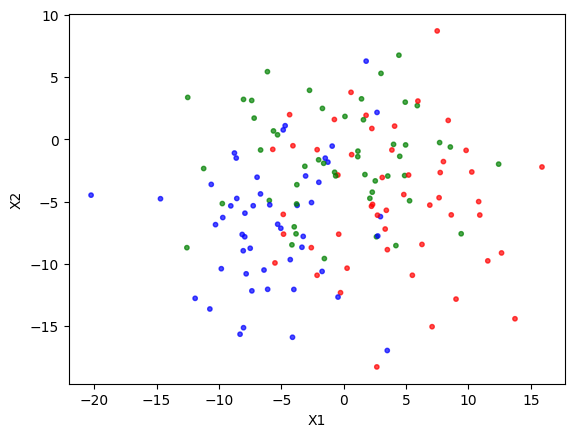

In [16]:
# Visualize on the X1 vs X2 plane. X1 ==> column 0,  X2 ==> column 1.  
# We can hardly tell the clusters apart! 
# The clusters largely overlap.
plt.scatter(X[:,0],X[:,1],marker="o",alpha=0.7, s=10, c=labelColors)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

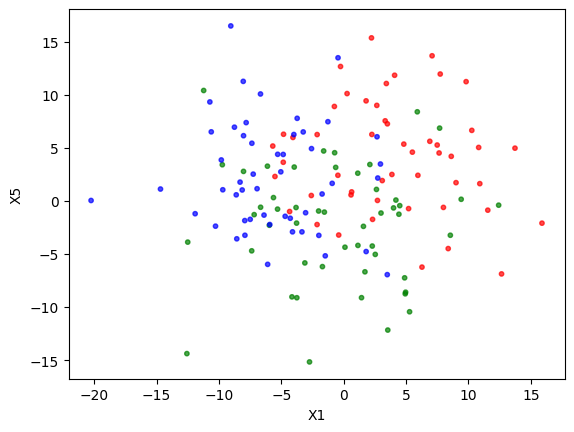

In [17]:
# Visualize on the X1 vs X5 plane. X1 ==> column 0,  X5 ==> column 4.  
# We can hardly tell the clusters apart!
# The clusters largely overlap.
plt.scatter(X[:,0],X[:,4],marker="o",alpha=0.7, s=10, c=labelColors)
plt.xlabel("X1")
plt.ylabel("X5")
plt.show()

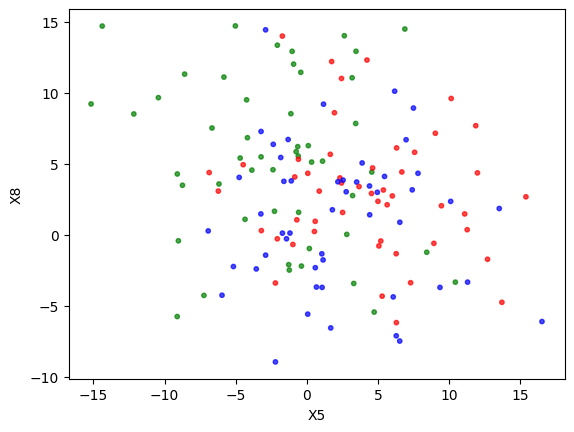

In [18]:
# Visualize on the X5 vs X8 plane. X5 ==> column 4,  X8 ==> column 7.  
# We can hardly tell the clusters apart!
# The clusters largely overlap.
plt.scatter(X[:,4],X[:,7],marker="o",alpha=0.7, s=10, c=labelColors)
plt.xlabel("X5")
plt.ylabel("X8")
plt.show()

#### 3.2. Visualize on the plane defined by PC1 and PC2:

In [19]:
# Only 2 first PCs are needed. 
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

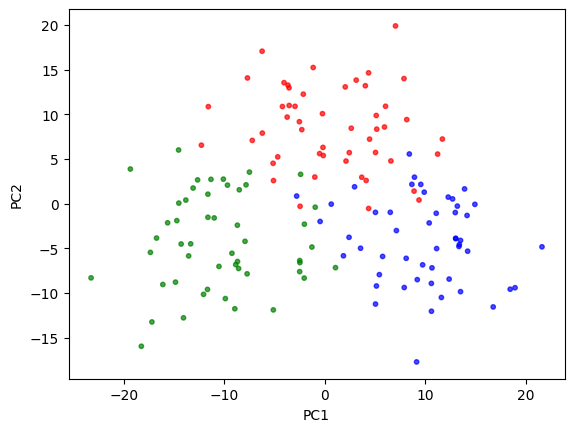

In [20]:
# Visualize on the PC1 vs PC2 plane.
# The clusters overlap the least!
plt.scatter(X_pca[:,0],X_pca[:,1],marker="o",alpha=0.7, s=10, c=labelColors)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()